In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:

df.info()

null_counts = df.isnull().sum()
print(null_counts)

duplicate_count = df.duplicated().sum()
print(duplicate_count)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
0


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,False,True,False,True,False
1,1,3,47.0,1,0,7.0000,True,False,False,False,True
2,0,2,62.0,0,0,9.6875,False,True,False,True,False
3,0,3,27.0,0,0,8.6625,False,True,False,False,True
4,1,3,22.0,1,1,12.2875,True,False,False,False,True


In [51]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
print(df_imputed.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0       0.0     3.0  34.5    0.0    0.0   7.8292         0.0       1.0   
1       1.0     3.0  47.0    1.0    0.0   7.0000         1.0       0.0   
2       0.0     2.0  62.0    0.0    0.0   9.6875         0.0       1.0   
3       0.0     3.0  27.0    0.0    0.0   8.6625         0.0       1.0   
4       1.0     3.0  22.0    1.0    1.0  12.2875         1.0       0.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         1.0         0.0  
1         0.0         0.0         1.0  
2         0.0         1.0         0.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df_imputed.drop('Survived', axis=1)
y = df_imputed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



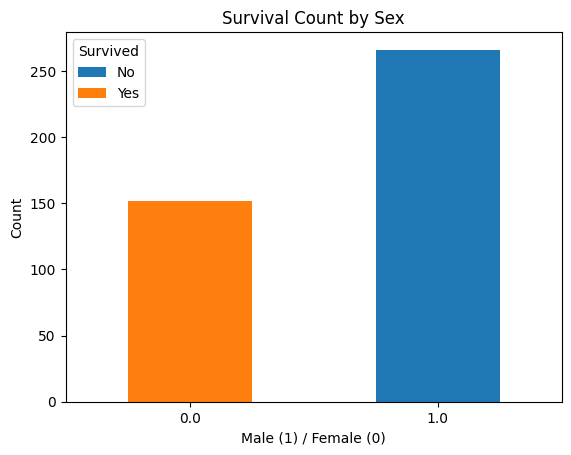

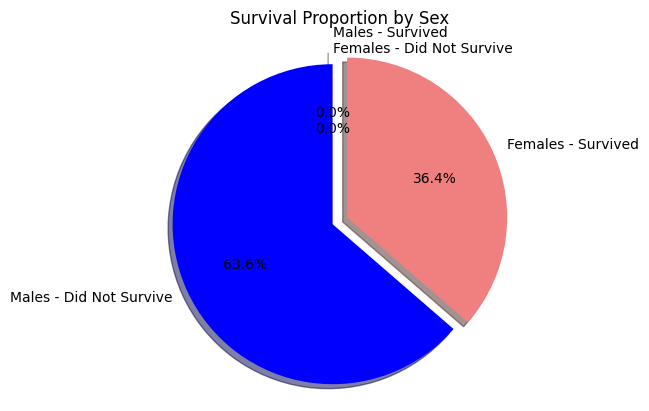

In [48]:
survivors_by_sex = df_imputed.groupby(['Sex_male', 'Survived'])['Survived'].count().unstack()

# Plot the results
survivors_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Male (1) / Female (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Calculate total counts
total_males = df_imputed['Sex_male'].sum()
total_females = len(df_imputed) - total_males
survived_males = df_imputed[(df_imputed['Sex_male'] == 1) & (df_imputed['Survived'] == 1)]['Survived'].count()
survived_females = df_imputed[(df_imputed['Sex_male'] == 0) & (df_imputed['Survived'] == 1)]['Survived'].count()

# Create a pie chart
labels = ['Males - Survived', 'Males - Did Not Survive', 'Females - Survived', 'Females - Did Not Survive']
sizes = [survived_males, total_males - survived_males, survived_females, total_females - survived_females]
colors = ['lightblue', 'blue', 'lightcoral', 'red']
explode = (0.1, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survival Proportion by Sex')
plt.axis('equal')
plt.show()


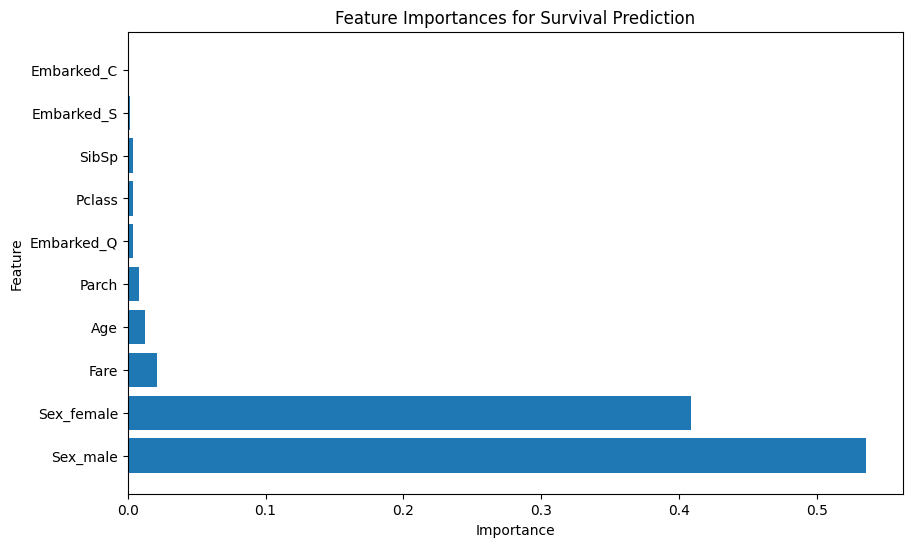

In [ ]:
importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Survival Prediction')
plt.show()